##### Just using this Jupyter Notebook to work some things out 

In [1]:
# Dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# <g></g>
# <script>d3.select("g").text("Project 2")</script>

In [23]:
file = r"C:\Users\Lenovo_7\Desktop\Class_Folders\Project_2\data\data.csv"

## Pandas & Matplotlib

In [4]:
executions_df = pd.read_csv(file)
executions_df.head()

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
0,01/17/1977,Gary Gilmore,36,Male,White,Murder,1,Male,White,Utah,UT,West,Firing Squad,No,Yes,No,No
1,05/25/1979,John Spenkelink,30,Male,White,Murder,1,Male,White,Leon,FL,South,Electrocution,No,No,No,No
2,10/22/1979,Jesse Bishop,46,Male,White,Murder,1,Male,White,Clark,NV,West,Gas Chamber,No,Yes,No,No
3,03/09/1981,Steven Judy,24,Male,White,Murder,4,"2 Male, 2 Female",White,Marion,IN,Midwest,Electrocution,No,Yes,No,No
4,08/10/1982,Frank Coppola,38,Male,White,Murder,1,Male,White,Newport News City,VA,South,Electrocution,No,Yes,No,No


In [5]:
executions_df.columns

Index(['Date', 'Name', 'Age', 'Sex', 'Race', 'Crime', 'Victim Count',
       'Victim Sex', 'Victim Race', 'County', 'State', 'Region', 'Method',
       'Juvenile', 'Volunteer', 'Federal', 'Foreign National'],
      dtype='object')

In [6]:
#Renaming columns: Removing spacing and changing to lowercase
executions_df = executions_df.rename(columns={'Date': 'date', 'Name':'name', 'Age':'age', 'Sex':'sex', 
                                              'Race':'race', 'Crime':'crime', 'Victim Count':'victim_count',
                                              'Victim Sex':'victim_sex', 'Victim Race':'victim_race', 
                                              'County':'county','State':'state', 'Region':'region', 'Method':'method',
                                              'Juvenile':'juvenile','Volunteer':'volunteer', 'Federal':'federal', 
                                              'Foreign National':'foreign_national'})

In [7]:
states = executions_df["state"].value_counts()
states_df = states.rename_axis('state').reset_index(name='total')
states_df.head()

,state,total
0,TX,538
1,OK,112
2,VA,111
3,FL,92
4,MO,87


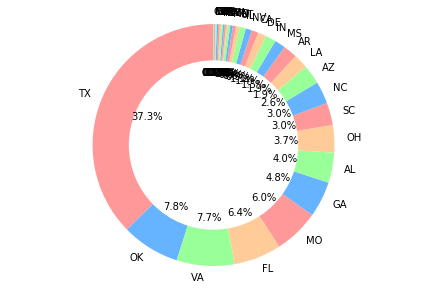

In [8]:
sizes = states_df["total"]
labels=states_df["state"]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,colors = colors, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
# # Save Figure
# # plt.savefig(".png")
plt.show()

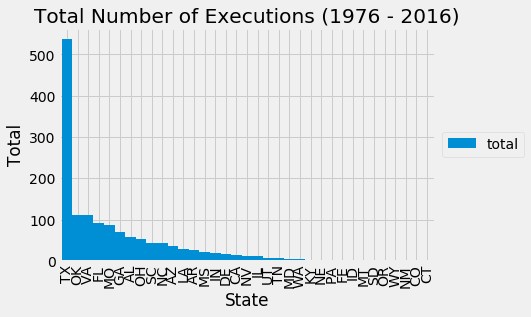

<Figure size 432x288 with 0 Axes>

In [9]:
plt.style.use("fivethirtyeight")

states_df.plot(kind="bar", x="state", width=1)

plt.title("Total Number of Executions (1976 - 2016)")
plt.ylabel("Total")
plt.xlabel("State")
plt.grid(True)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# plt.savefig("#.png", bbox_inches="tight")

plt.show()
plt.tight_layout()

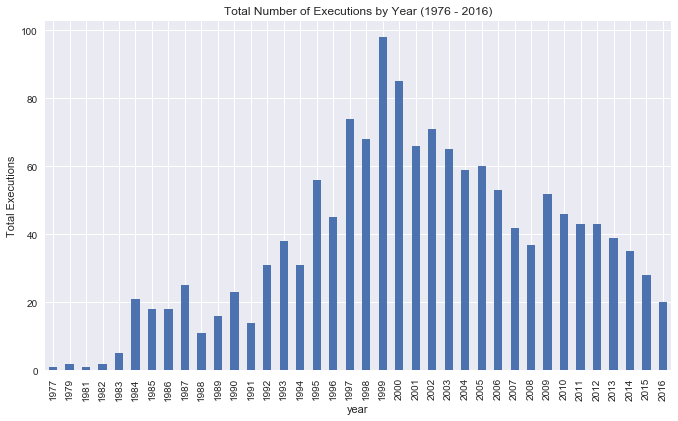

In [10]:
plt.style.use("seaborn")
executions_df['date'] = pd.to_datetime(executions_df['date'])
executions_df['year'] = executions_df['date'].map(lambda x: x.year)
yearly_ex = executions_df.groupby(['year'])['name'].count()
ax = yearly_ex.plot.bar(figsize=(10,6), title="Total Number of Executions by Year (1976 - 2016)")
label = plt.ylabel("Total Executions")
plt.show()

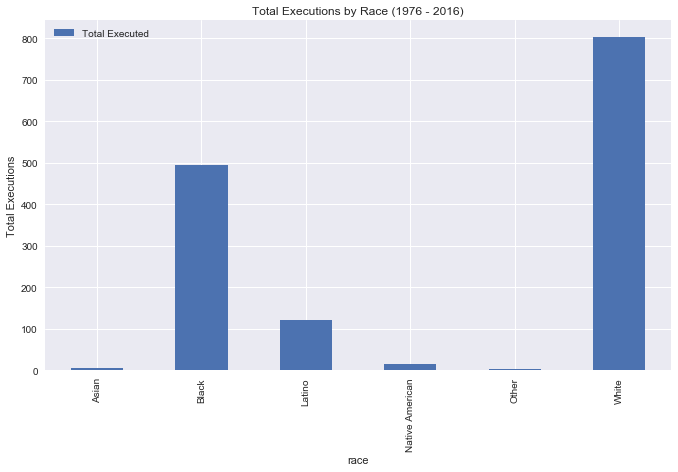

In [11]:
plt.style.use("seaborn")
race_ex = executions_df.groupby(['race'], as_index=False)['name'].count()
race_ex.rename(columns={'name':'Total Executed'}, inplace=True)
ax = race_ex.plot.bar(figsize=(10,6), x='race', y='Total Executed', title="Total Executions by Race (1976 - 2016)")
label = plt.ylabel("Total Executions")
plt.show()

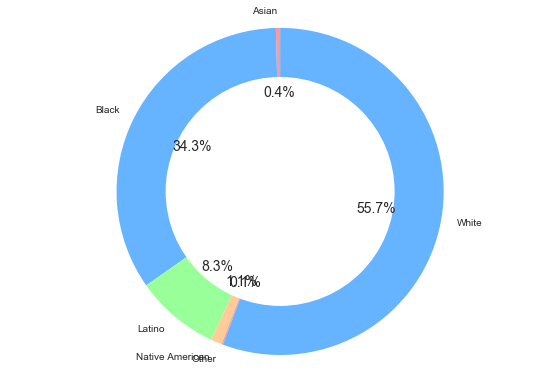

In [12]:
# Racial Breakdown of executions 
sizes = race_ex["Total Executed"]
labels= race_ex["race"]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,colors = colors, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
# # Save Figure
# # plt.savefig(".png")
plt.show()

## Plotly

In [13]:
#imports
import plotly
from plotly import __version__
print (__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
import ipywidgets as widgets
# from scipy import special
import plotly.express as px
import plotly.offline as pyo

#Connecting notebook
plotly.offline.init_notebook_mode(connected=True)

4.1.0


In [14]:
ex = [go.Bar(x=states_df.state,
            y=states_df.total)]

plotly.offline.iplot(ex, filename='plotly-bar-ex')

In [15]:
#load in latitude and logitude csv
latlong = r"C:\Users\Lenovo_7\Desktop\Class_Folders\Project_2\states.csv"

In [16]:
latlong_df = pd.read_csv(latlong)
merged_states_df = pd.merge(states_df, latlong_df, on="state")
merged_states_df.head()
#export to csv
merged_states_df.to_csv(r'C:\Users\Lenovo_7\Desktop\Class_Folders\Project_2\data2.csv')


In [17]:
mapbox_access_token = 'pk.eyJ1Ijoibmltb29zbWFuIiwiYSI6ImNrMWJkNXBzYjJtZWQzbHFkdzQ2MnM1aWoifQ.7aqrVzK8njtK4rRAbwfhaw'

site_lat = merged_states_df.latitude
site_lon = merged_states_df.longitude
locations_name = merged_states_df.state
text = merged_states_df.total

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='all'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='all'
    )]


layout = go.Layout(
    title='Executions',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='Executions')

## Javascript and D3

In [18]:
from IPython.display import Javascript
from IPython.core.display import display, HTML
from string import Template
%load_ext py_d3

In [19]:
#Reformatting data as an array of dictionaries
executions_dict = executions_df.to_dict(orient='records')
# executions_dict[:1]

In [20]:
# Attach data to the current window
Javascript("""
           window.executions_dict={};
           """.format(executions_dict))

<IPython.core.display.Javascript object>

In [21]:
%%javascript
require.config({
    paths: {
        d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
    }
});

<IPython.core.display.Javascript object>

In [22]:
# HTML inline styling
HTML("""
<style>
path { 
    stroke-width: 1;
    fill: none;
    stroke-linejoin: round;
    stroke-linecap: round;
}
circle { 
  stroke-width: 1;
}
.axis path,
.axis line {
  fill: none;
  stroke: grey;
  stroke-width: 1;
  shape-rendering: crispEdges;
}
.legend, .label, .hover-text{
    font-size: x-small;
    background-color: white;
}
</style>
""")